<a href="https://colab.research.google.com/github/Amelaouadni/Computer-vision-/blob/master/TP1_image_classificationj.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
%tensorflow_version 2.x
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt


In [0]:
(train_image, train_labels), (test_image, test_labels) = tf.keras.datasets.cifar10.load_data()

In [0]:
train_image.shape, train_labels.shape, test_image.shape, test_labels.shape

((50000, 32, 32, 3), (50000, 1), (10000, 32, 32, 3), (10000, 1))

In [0]:
train_labels_encoded = tf.keras.utils.to_categorical(train_labels)
test_labels_encoded = tf.keras.utils.to_categorical(test_labels)

In [0]:
train_labels_encoded[0]

array([0., 0., 0., 0., 0., 0., 1., 0., 0., 0.], dtype=float32)

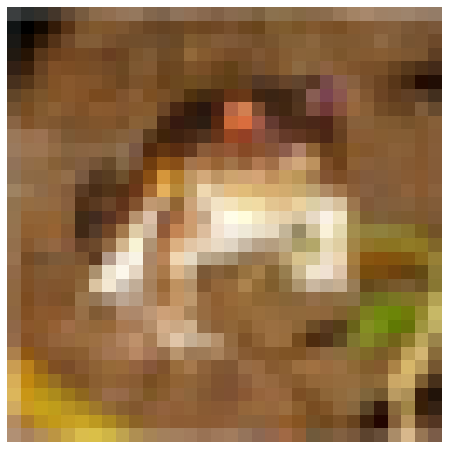

In [0]:
 fig = plt.figure(figsize=(8,8))
 ax = fig.add_subplot(1, 1, 1)
 ax.imshow(train_image[0])
 ax.set_axis_off()
 plt.show()

In [0]:
input_shape=train_image[0].shape
base_model = tf.keras.Sequential()
base_model.add(tf.keras.layers.Flatten(input_shape=input_shape))
base_model.add(tf.keras.layers.Dense(64, activation='relu'))
base_model.add(tf.keras.layers.Dense(10, activation='softmax'))



In [0]:
base_model.summary()

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_5 (Flatten)          (None, 3072)              0         
_________________________________________________________________
dense_7 (Dense)              (None, 64)                196672    
_________________________________________________________________
dense_8 (Dense)              (None, 10)                650       
Total params: 197,322
Trainable params: 197,322
Non-trainable params: 0
_________________________________________________________________


In [0]:
def normalize(train_images_, test_images_):
  # convert from integers to floats
  train_norm = train_images_.astype('float32')
  test_norm = test_images_.astype('float32')
  # normalize to range 0-1
  train_norm = train_norm / 255.0
  test_norm = test_norm / 255.0
  # return normalized images
  return train_norm, test_norm

In [0]:
train_images, test_images = normalize(train_image, test_image)

In [0]:
opt = tf.keras.optimizers.SGD(lr=0.001, momentum=0.9)
base_model.compile(optimizer=opt,loss='categorical_crossentropy',metrics=['accuracy'])

In [0]:
history=base_model.fit(train_images, train_labels_encoded, epochs=10, batch_size=64,validation_data=(test_images,test_labels_encoded))

Train on 50000 samples, validate on 10000 samples
Epoch 1/10
50000/50000 [==============================] - 4s 85us/sample - loss: 1.9421 - accuracy: 0.3056 - val_loss: 1.8159 - val_accuracy: 0.3614
Epoch 2/10
50000/50000 [==============================] - 4s 78us/sample - loss: 1.7864 - accuracy: 0.3750 - val_loss: 1.7500 - val_accuracy: 0.3855
Epoch 3/10
50000/50000 [==============================] - 4s 80us/sample - loss: 1.7244 - accuracy: 0.3983 - val_loss: 1.6974 - val_accuracy: 0.4104
Epoch 4/10
50000/50000 [==============================] - 4s 78us/sample - loss: 1.6856 - accuracy: 0.4117 - val_loss: 1.6778 - val_accuracy: 0.4125
Epoch 5/10
50000/50000 [==============================] - 4s 79us/sample - loss: 1.6484 - accuracy: 0.4234 - val_loss: 1.6502 - val_accuracy: 0.4182
Epoch 6/10
50000/50000 [==============================] - 4s 82us/sample - loss: 1.6194 - accuracy: 0.4348 - val_loss: 1.6461 - val_accuracy: 0.4179
Epoch 7/10
50000/50000 [==============================] 